In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
!pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-nzomao7o
  Running command git clone --filter=blob:none --quiet https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-nzomao7o
  Resolved https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to commit b17a265d3b8253424e5b38872457f7437909a65d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.8/76.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 45.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/tech_aca_data.csv')
df.columns

Index(['Title', 'Text', 'Author', 'Reply', 'LastReply', 'PublishTime', 'Like',
       'Collect', 'Repost', 'Community_name', 'seg_text', 'tokenized_text',
       'Reply_Year', 'Reply_Month', 'Reply_Day', 'Pub_Year', 'Pub_Month',
       'Pub_Day', 'normalized_text', 'tokenized_sentences', 'TopPost',
       'Length', 'Aca'],
      dtype='object')

In [4]:
# prompt: select ACA=1

# Assuming 'df' is already defined as in the provided code.
df_aca = df[df['Aca'] == 1]
df_aca.head(5)

,Title,Text,Author,Reply,LastReply,PublishTime,Like,Collect,Repost,Community_name,...,Reply_Month,Reply_Day,Pub_Year,Pub_Month,Pub_Day,normalized_text,tokenized_sentences,TopPost,Length,Aca
0,精华\n\n\n \n ...,由猴面包树组员倡议，我们小组建立官方slack交流群啦！为了营造一个更友好安全的交流氛围，目...,Anon加重音,1115,2023-12-21,2020-10-09,2,4,4,Academia,...,12,21,2020,10,9,"['猴面包树', '组员', '倡议', '小组', '建立', '官方', 'slack'...","[['猴面包树', '组员', '倡议', '小组', '建立', '官方', 'slack...",True,313,1.0
1,精华\n\n\n \n ...,—————————本帖为问卷调查、招募研究对象的集中贴，姐妹们如有问卷调查需要大家帮忙填写或...,Anon加重音,64,2023-12-01,2020-10-14,1,2,1,Academia,...,12,1,2020,10,14,"['本帖', '问卷调查', '招募', '研究', '对象', '贴', '姐妹', '问...","[['本帖', '问卷调查', '招募', '研究', '对象', '贴', '姐妹', '...",True,67,1.0
2,精华\n\n\n \n ...,前情(意见征集贴) https://www.douban.com/group/topic/1...,Anon加重音,12,2023-07-04,2020-10-10,4,6,4,Academia,...,7,4,2020,10,10,"['前', '情', '意见', '征集', '贴', 'https', 'www', 'd...","[['前', '情', '意见', '征集', '贴', 'https', 'www'], ...",True,244,1.0
3,精华\n\n\n \n ...,论坛第二期分享会她说PhD：不同的人生路径的文字稿和音频分享来啦。非常感谢小组长们的全力支持...,Sophie,2,2023-05-03,2020-11-02,1,6,0,Academia,...,5,3,2020,11,2,"['论坛', '第二期', '分享', '会', '说', 'PhD', '人生', '路径...","[['论坛', '第二期', '分享', '会', '说', 'phd', '人生', '路...",True,177,1.0
4,精华\n\n\n \n ...,09/30/21更新: 管理员实在是没有能力及时追踪所有申请相关的帖子，大家有相关的帖子想要...,丸子,6,2023-03-25,2020-12-09,2,2,1,Academia,...,3,25,2020,12,9,"['09', '30', '21', '更新', '管理员', '实在', '能力', '追...","[['更新', '管理员', '实在', '能力', '追踪', '申请', '相关', '...",True,478,1.0


## Identify active users

In [5]:
#
# Group by the 'Author' column and count the posts
author_post_counts = df_aca.groupby('Author').size().reset_index(name='Post_Count')

# Sort by post count if desired
author_post_counts = author_post_counts.sort_values(by='Post_Count', ascending=False)

# Display the result
author_post_counts

,Author,Post_Count
715,momo,469
870,your chance,34
73,Anon加重音,27
729,mountainriver,27
2119,萧亚萌,20
...,...,...
1428,小面条,1
528,Wollstonecraft,1
529,WuCH,1
1424,小赵同学,1


In [6]:
# prompt: count the number and percentage of authors who have posted only 1 time

# Count authors with only 1 post
single_post_authors = author_post_counts[author_post_counts['Post_Count'] == 1]
num_single_post_authors = len(single_post_authors)

# Calculate the percentage
total_authors = len(author_post_counts)
percentage_single_post = (num_single_post_authors / total_authors) * 100

print(f"Number of authors with only 1 post: {num_single_post_authors}")
print(f"Percentage of authors with only 1 post: {percentage_single_post:.2f}%")

Number of authors with only 1 post: 1386
Percentage of authors with only 1 post: 56.64%


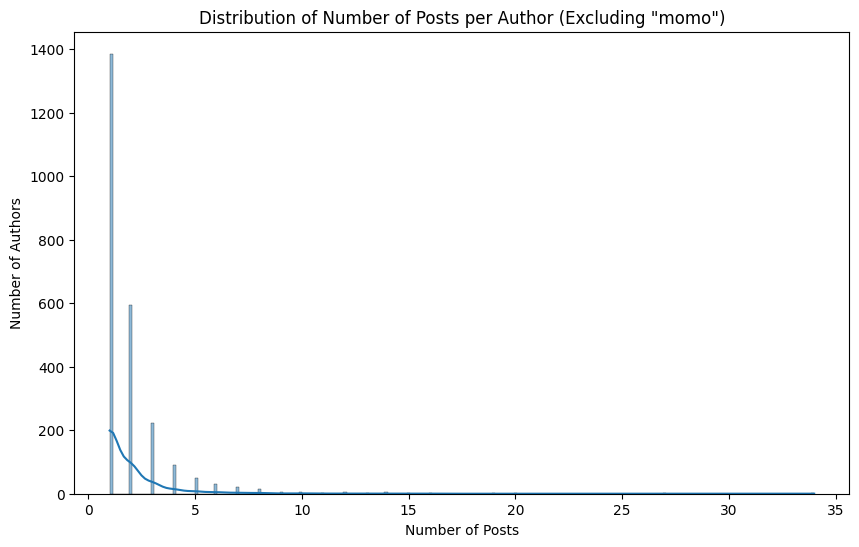

In [7]:
#Eliminate 'momo' (assuming 'momo' is a value in a column, replace 'Author' if necessary)
#If you want to remove rows where the 'Author' column contains 'momo'
df_aca_no_momo = df_aca[df_aca['Author'] != 'momo']

# Group by author and count posts
author_post_counts = df_aca_no_momo.groupby('Author').size().reset_index(name='Post_Count')

# Plot the distribution
plt.figure(figsize=(10, 6))
sns.histplot(author_post_counts['Post_Count'], kde=True) #kde=True adds a kernel density estimate
plt.title('Distribution of Number of Posts per Author (Excluding "momo")')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Authors')
plt.show()

In [8]:
# Calculate the 75th and 90th percentiles
threshold_75 = author_post_counts['Post_Count'].quantile(0.75)
threshold_90 = author_post_counts['Post_Count'].quantile(0.90)

print(f"75th Percentile Threshold: {threshold_75}")
print(f"90th Percentile Threshold: {threshold_90}")

75th Percentile Threshold: 2.0
90th Percentile Threshold: 3.0


In [9]:
# Calculate IQR
Q1 = author_post_counts['Post_Count'].quantile(0.25)
Q3 = author_post_counts['Post_Count'].quantile(0.75)
IQR = Q3 - Q1

# Define an "active user" as anyone above Q3 + 1.5*IQR
active_threshold = Q3 + 1.5 * IQR

print(f"Threshold for Active Users (IQR Method): {active_threshold}")

Threshold for Active Users (IQR Method): 3.5


In [10]:
# prompt: use the IQR Threshold, and add a new column "active_author" in df_aca, with 1 indicating above the threshold and 0 indicating under the threshold.

# Create the 'active_author' column based on the IQR threshold
df_aca['active_author'] = df_aca['Author'].map(author_post_counts.set_index('Author')['Post_Count']).apply(lambda x: 1 if x >= active_threshold else 0)
df_aca[['Author','active_author']]

<ipython-input-10-66eb32c9e09f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aca['active_author'] = df_aca['Author'].map(author_post_counts.set_index('Author')['Post_Count']).apply(lambda x: 1 if x >= active_threshold else 0)


,Author,active_author
0,Anon加重音,1
1,Anon加重音,1
2,Anon加重音,1
3,Sophie,1
4,丸子,1
...,...,...
5249,路亦槑,0
5250,Anon加重音,1
5251,多喜子,0
5252,Anon加重音,1


In [11]:
df_aca['active_author'].describe()

,active_author
count,5254.000000
mean,0.292158
std,0.454798
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df_aca.columns

Index(['Title', 'Text', 'Author', 'Reply', 'LastReply', 'PublishTime', 'Like',
       'Collect', 'Repost', 'Community_name', 'seg_text', 'tokenized_text',
       'Reply_Year', 'Reply_Month', 'Reply_Day', 'Pub_Year', 'Pub_Month',
       'Pub_Day', 'normalized_text', 'tokenized_sentences', 'TopPost',
       'Length', 'Aca', 'active_author'],
      dtype='object')

In [14]:
df_reply_counts = pd.read_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/author_reply_counts.csv')

df_reply_counts.head()

,Reply_author,Reply_Count
0,#Elysium#,1
1,#第三只耳朵#,3
2,#鼓鼓#,1
3,(˃ ⌑ ˂ഃ ),2
4,(ﾟoﾟ;,5


In [16]:
# prompt: merge the Reply_Count column in df_reply_counts to author_post_counts based on same value of "Author" and "Reply_Author"

# Merge the dataframes
merged_df = pd.merge(author_post_counts, df_reply_counts, left_on='Author', right_on='Reply_author', how='left')

# Fill NaN values in 'Reply_Count' with 0 (if a user has no replies, their reply count is 0)
merged_df['Reply_Count'] = merged_df['Reply_Count'].fillna(0)

# Display the merged dataframe
merged_df

,Author,Post_Count,Reply_author,Reply_Count
0,#琴琴贴贴🎻#,1,NaN,0.0
1,(๑´ڡ`๑),4,NaN,0.0
2,-,3,-,2.0
3,-Agnés,1,NaN,0.0
4,-Cutehuan-,1,NaN,0.0
...,...,...,...,...
2441,🦖,1,🦖,1.0
2442,🦞,1,🦞,1.0
2443,🦷🦷乐,3,NaN,0.0
2444,🧸,1,NaN,0.0


In [18]:
# Calculate IQR
Q1 = merged_df['Reply_Count'].quantile(0.25)
Q3 = merged_df['Reply_Count'].quantile(0.75)
IQR = Q3 - Q1

# Define an "active user" as anyone above Q3 + 1.5*IQR
active_threshold_replying = Q3 + 1.5 * IQR

print(f"Threshold for Active Users of Replying (IQR Method): {active_threshold}")

Threshold for Active Users of Replying (IQR Method): 3.5


In [19]:
df_aca['active_reply_author'] = df_aca['Author'].map(merged_df.set_index('Author')['Reply_Count']).apply(lambda x: 1 if x >= active_threshold_replying else 0)
df_aca[['Author', 'active_author', 'active_reply_author']]

<ipython-input-19-cd0e2df63d22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aca['active_reply_author'] = df_aca['Author'].map(merged_df.set_index('Author')['Reply_Count']).apply(lambda x: 1 if x >= active_threshold_replying else 0)


,Author,active_author,active_reply_author
0,Anon加重音,1,1
1,Anon加重音,1,1
2,Anon加重音,1,1
3,Sophie,1,0
4,丸子,1,0
...,...,...,...
5249,路亦槑,0,0
5250,Anon加重音,1,1
5251,多喜子,0,0
5252,Anon加重音,1,1


In [20]:
# prompt: what is the percent of rows that active_author value equals active_reply_author value?

# Calculate the percentage of rows where 'active_author' equals 'active_reply_author'
matching_rows = len(df_aca[df_aca['active_author'] == df_aca['active_reply_author']])
total_rows = len(df_aca)
percentage = (matching_rows / total_rows) * 100

print(f"Percentage of rows where 'active_author' equals 'active_reply_author': {percentage:.2f}%")

Percentage of rows where 'active_author' equals 'active_reply_author': 73.13%


In [21]:
# prompt: save df_aca as data_aca.csv

df_aca.to_csv('/content/drive/MyDrive/MA_Thesis/DBCommunity/saved_data/data_aca.csv', index=False)